# Creating a dataset to train the model to recognize whether the voice belongs to a person or not


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
validate = pd.read_csv('../data/validated.tsv',  sep='\t')

In [5]:
sample_count

ab43bbde8dd98948b7e6b8393d966519e92744fd96172349c9d20cd1247a67a9e41415818b1ab8f0c456d23244cf15a1188a078707b96a3a8476783890c4a42f    779
372293e65cdab88771e028a4351651ab2eff64438ddafc211e089247dcdccca350153465eb5409ce708081d9ad384af45d1dc57bbe030ae1a2c0edd561322fb8    346
7275df3ab29386b68c10c396e31ed2476d1e25de0ac97913a17ab5a0e58d8bbf43cb7235ce9814a20321bef87f140c01900a4ceef94af8cef0a350ed14b3fa6e    332
b87dd0680063cbd3dc57f5b9b20c14f020f511c3f18467d52e816db909dbe2be05b8ea36a4bca91179503817a1b093a9e6036abb514c6ad1aaf1ffa71b3d32ce    205
31bee08bea18ab5748d1ceef15c1690991f28ddffa87c9bc0e40c63461f955d81a81bc170aa631a7434f53b0ce1a81e541b31f207e78ab15a43c1ebf8be95825    139
                                                                                                                                   ... 
ab1ccf50da6c569b910860d320128c7da0c875739801b43b9785b4baa3098f63e583d9fc25714f2c79aea49844c4d6565ac61a9b11f2dbcd7bfc49be11072f8c      1
ab085b9ac3cebc436be586ed75acade504a0c7138afc932b

In [4]:
sample_count = validate['client_id'].value_counts()

In [4]:
validate['client_id'].nunique()

422

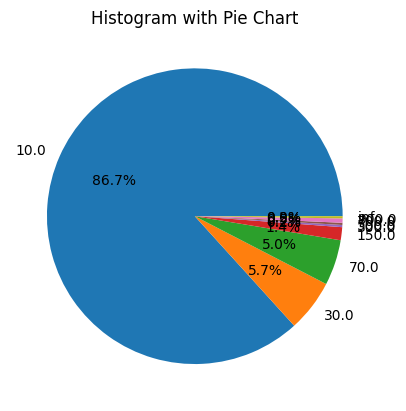

In [22]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.array([0, 10, 20, 50, 100, 200, 300, 400, 500 ] + [float('inf')])
hist, edges = np.histogram([e for e in sample_count], bins=bins)
plt.pie(hist, labels=[], autopct='%1.1f%%')
plt.title('Histogram with Pie Chart')
plt.show()

<BarContainer object of 9 artists>

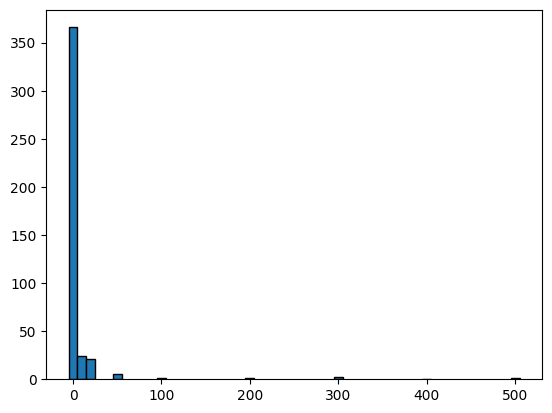

In [7]:


plt.bar(edges[:-1], hist, width=10, edgecolor='black')

In [5]:
valid_client_ids = [e for e in sample_count[sample_count < 500][sample_count >= 5].index]

In [6]:
clean_data = validate[validate['client_id'].isin(valid_client_ids)][['client_id', 'path']]

In [15]:
def concatenation(train_data: pd.DataFrame, anchor: pd.DataFrame, posneg: pd.DataFrame) -> pd.DataFrame:
		data_particle_case = pd.DataFrame(columns=['anchor_client_id', 'anchor_path', 'posneg_client_id', 'posneg_path', 'anchor_source', 'posneg_source'])
		data_particle_case[['anchor_client_id', 'anchor_path', 'anchor_source']] = anchor
		data_particle_case[['posneg_client_id', 'posneg_path', 'posneg_source']] = posneg
		
		return pd.concat([train_data, data_particle_case], ignore_index=True)

def data_generation(data, data_frac=1):
	client_ids = data['client_id'].unique()
	data['source'] = 'original'
	
	res_data = pd.DataFrame(columns=['anchor_client_id', 'anchor_path', 'posneg_client_id', 'posneg_path', 'anchor_source', 'posneg_source'])
	for id in client_ids:
		client_id_sample = data[data['client_id'] == id] 
		no_client_id_sample = data[data['client_id'] != id]
		
		#anchor_original = client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		#positive_original = client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		#res_data = concatenation(res_data, anchor_original, positive_original)
		anchor_neg_original = client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		negative_generated = no_client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		res_data = concatenation(res_data, anchor_neg_original, negative_generated)
		anchor_neg_original = client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		negative_generated = no_client_id_sample.sample(frac=data_frac).reset_index(drop=True)
		res_data = concatenation(res_data, anchor_neg_original, negative_generated)
	res_data['label'] = res_data['anchor_client_id'] == res_data['posneg_client_id']
	return res_data

In [47]:
train_base_data = data_generation(clean_data)

In [13]:
save_folder = '../dataset/'
dataset_name = 'train_base_dataset.csv'
save_path = save_folder + dataset_name

In [49]:
train_base_data.to_csv(save_path, index=False)

In [8]:
test_client_ids = [e for e in sample_count[sample_count < 5][sample_count >=2].index]

In [9]:
test_clean_validated_data = validate[validate['client_id'].isin(test_client_ids)][['client_id', 'path']].reset_index(drop=True)

In [16]:
clean_test_data = data_generation(test_clean_validated_data)

In [17]:
dataset_name = 'test_base_dataset_dump_other.csv'
save_path = save_folder + dataset_name
clean_test_data.to_csv(save_path, index=False)